#### Lecture 3 - Numerical errors and differentiation

Floating point representation: print range of values for 64-bit decimals on this system

In [1]:
# import numpy module that will be used for matrix operations
import numpy as np

print(str(np.finfo(np.float64)))   # 64-bit reals by default

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



We can access the attributes using `.max`, `.eps`, etc.
A few examples that create Inf/NaN values:

In [11]:
# multiplying the largest number by 2
# this will give an overflow warning (value too large to store)
print(np.finfo(np.float64).max * 2)   # Inf

inf


/var/folders/3q/q4pw14qn3r95vp8fslqnfl340000gn/T/ipykernel_59929/1288780920.py:3: RuntimeWarning: overflow encountered in double_scalars
  print(np.finfo(np.float64).max * 2)   # Inf


In [12]:
# dividing 5 by 0 
# using numpy here because default python will raise an error instead of a warning
print(np.divide(5,0))

inf


/var/folders/3q/q4pw14qn3r95vp8fslqnfl340000gn/T/ipykernel_59929/1673797736.py:3: RuntimeWarning: divide by zero encountered in true_divide
  print(np.divide(5,0))


In [13]:
# dividing 0/0 - note the error is different
print(np.divide(0,0))

nan


/var/folders/3q/q4pw14qn3r95vp8fslqnfl340000gn/T/ipykernel_59929/2659034772.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.divide(0,0))


Functions to check if a value is Inf/NaN:

In [14]:
x = 5
print(np.isnan(x))

False


In [15]:
print(np.isinf(x))

False


##### Roundoff Error
Example of subtractive cancellation

In [17]:
if (0.3 - 0.2 - 0.1 == 0.0):
    print('equal')
else:
    print('not equal')

not equal


In general, floating point numbers are almost never strictly equal
instead test within a tolerance, `a-eps <= x <= a+eps`

Another example of roundoff error - small numbers added to big ones may be chopped

In [19]:
x = 10 ** 16
if ((x + 0.25) == x):
    print('equal')
else:
    print('not equal')

equal


#### Truncation error and total numerical error
##### Textbook Example 4.8

$$ f(x) = -0.1x^4 - 0.15x^3 - 0.5x^2 - 0.25x + 1.2 $$

Use a centered difference approximation of $O(h^2)$ to
estimate the first derivative $f^\prime(x=0.5)$.

Start with $h=1$. Then progressively divide the step size by a factor of 10 
to demonstrate how roundoff error becomes dominant as the step size is reduced.
The exact value of the derivative is $-0.9125$.

In [20]:
# Import the numpy and matplotlib module 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

def f(x):
    return -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

x = 0.5 
exact = -0.9125

In [22]:
n  = 11 # number of step sizes
H  = np.zeros(n) # h values to store
Ea = np.zeros(n) # absolute error values to store

for i in range(n):
    h = 10 ** (-i)     # h = 1, 0.1, 0.01, 0.001, ...
    H[i] = h  # store the value of h in the array
    D = (f(x + h) - f(x - h)) / (2 * h) # centered difference
    Ea[i] = abs(exact - D) # absolute error

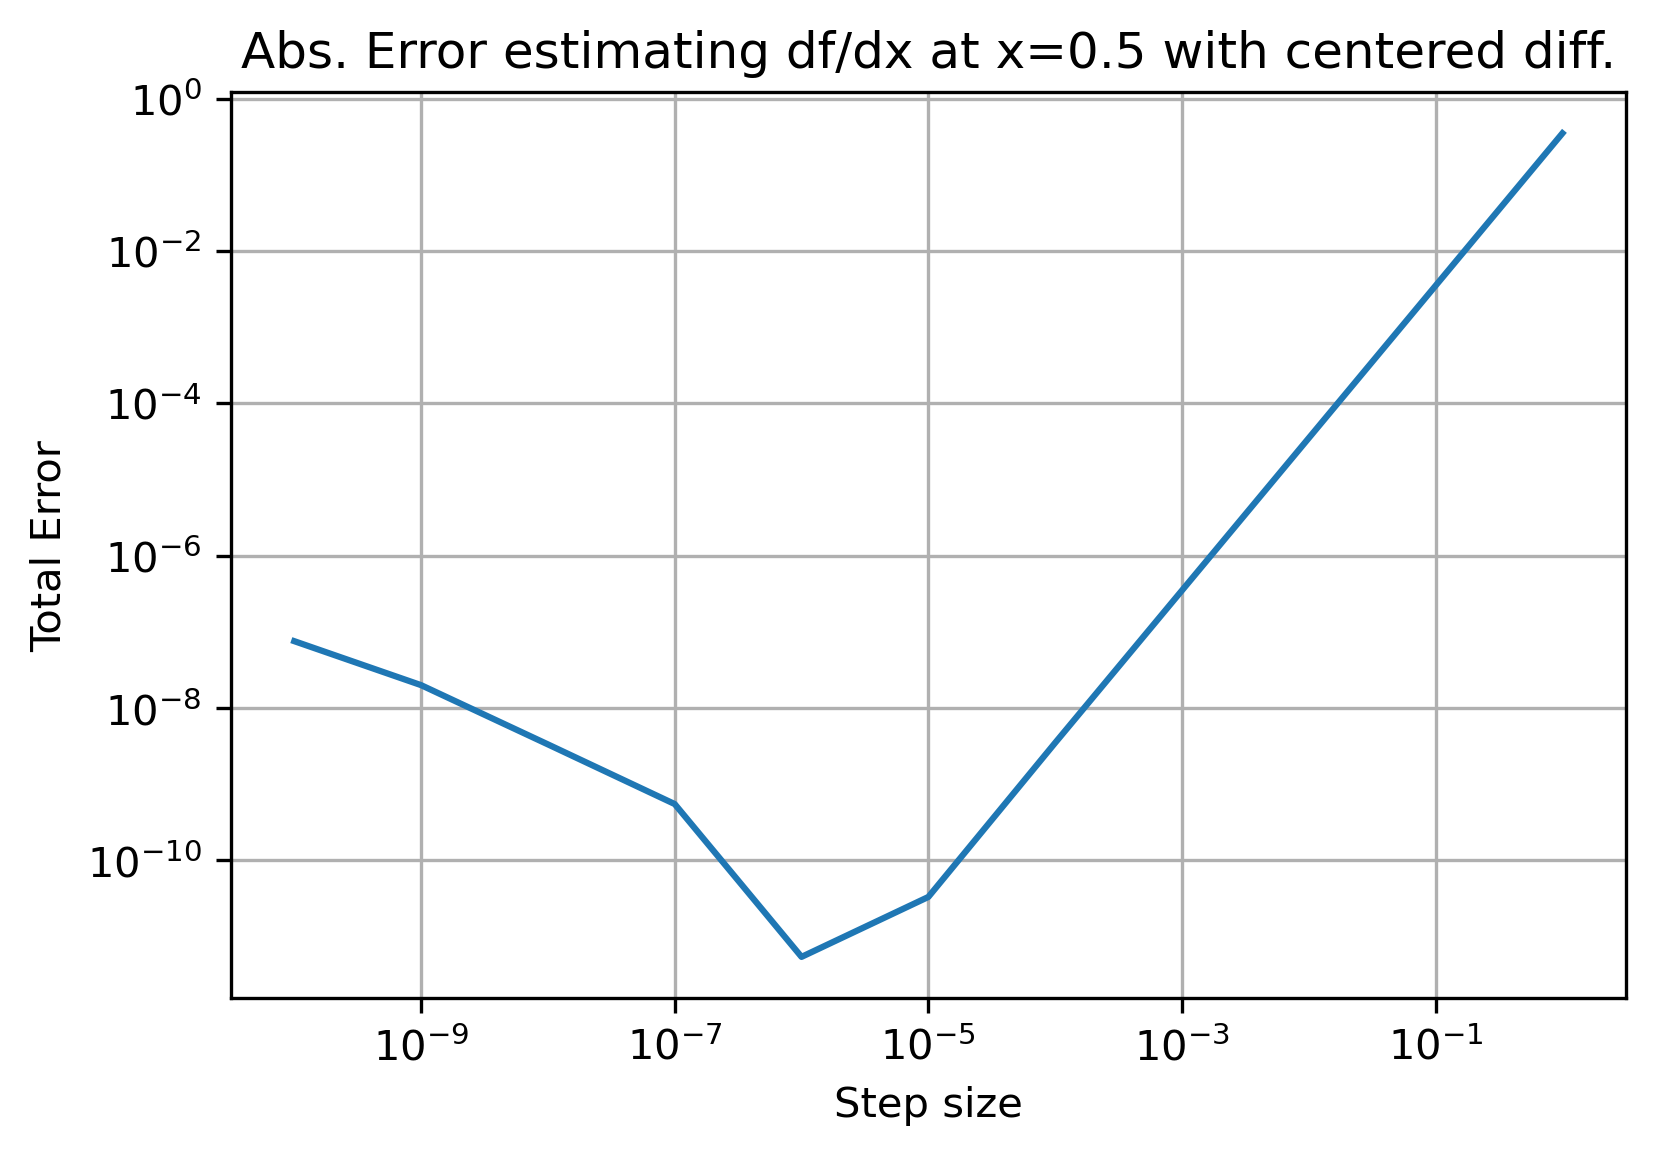

In [27]:
plt.loglog(H,Ea)
plt.title('Abs. Error estimating df/dx at x=0.5 with centered diff.') 
plt.xlabel('Step size')
plt.ylabel('Total Error')
plt.grid(True)

On the left side of the graph, roundoff error dominates. 
On the right side of the graph, truncation error dominates.
Note the right side slope is ~2, so the error decreases by 2 orders of magnitude for every 1 order of magnitude decrease in the step size.
This is what we would expect for an approximation with $O(h^2)$ error.